### Faceting
One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's FacetGrid class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [4]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);


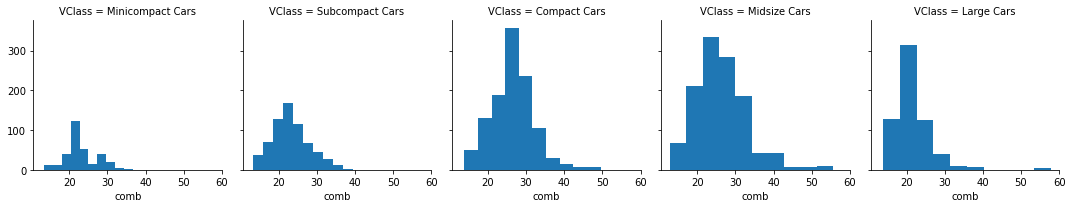

In [5]:
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, "comb")

**In the map call, just set the plotting function and variable to be plotted as positional arguments. Don't set them as keyword arguments, like x = "comb", or the mapping won't work properly.**

Notice that each subset of the data is being plotted independently. Each uses the default of ten bins from hist to bin together the data, and each plot has a different bin size. Despite that, the axis limits on each facet are the same to allow clear and direct comparisons between groups. It's still worth cleaning things a little bit more by setting the same bin edges on all facets. Extra visualization parameters can be set as additional keyword arguments to the map function.

### Example 2.

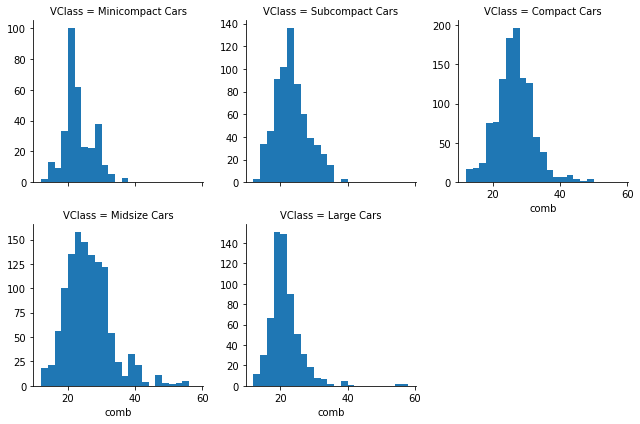

In [6]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

### Additional Variation

If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object's initialization to facilitate clarity in the conveyance of information. The example below includes a categorical variable, "trans", that has 27 different transmission types. Setting col_wrap = 7 means that the plots will be organized into rows of 7 facets each, rather than a single long row of 27 plots.

Also, we want to have the facets for each transmission type in the decreasing order of combined fuel efficiency.

### Example 3.

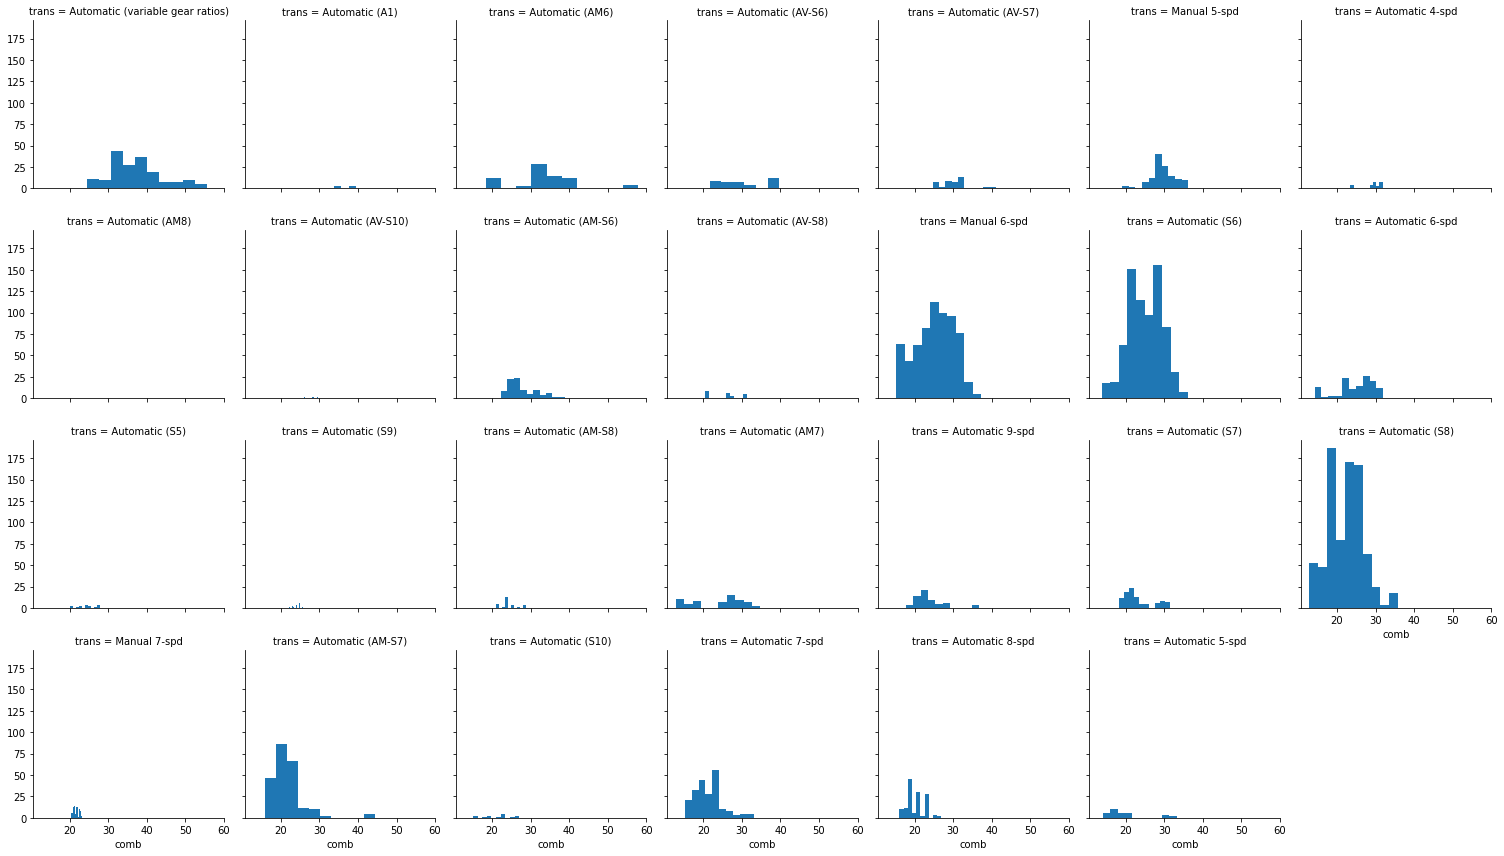

In [7]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')

### Adapted Bar Charts
Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's barplot function:

### Example 1.

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

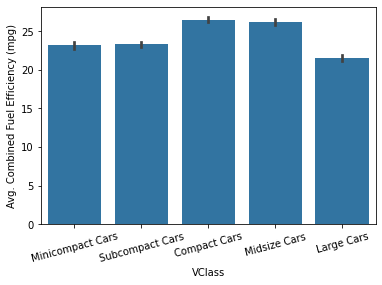

In [8]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size.

<AxesSubplot:xlabel='VClass', ylabel='comb'>

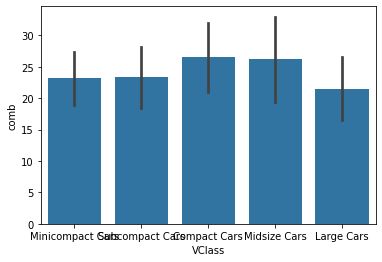

In [9]:
# Try these additional arguments
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')

As an alternative, the pointplot() function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

### Example 2.

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

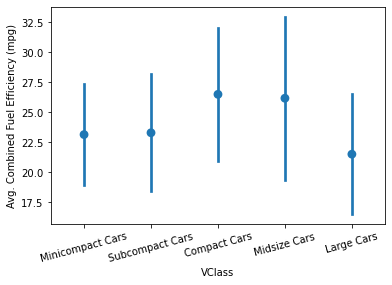

In [11]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

By default, pointplotwill connect values by a line. This is fine if the categorical variable is ordinal in nature, but it can be a good idea to remove the line via linestyles = "" for nominal data.

The above plots can be useful alternatives to the box plot and violin plot if the data is not conducive to either of those plot types. For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.

### Example 3. Bringing a few charts together

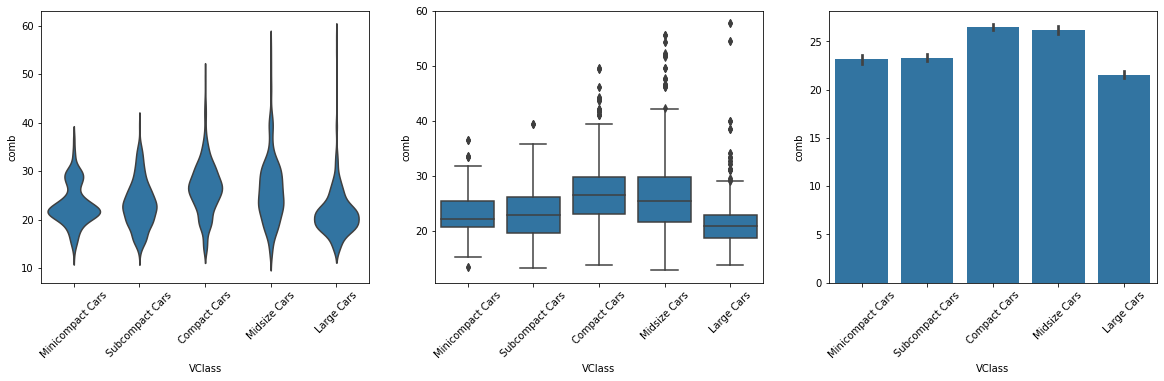

In [12]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

Matplotlib's hist() function can also be adapted so that bar heights indicate value other than a count of points through the use of the "weights" argument.